In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline 

/home/opotowsky/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
def color_variant(hex_color, brightness_offset=1):
    """ takes a color like #87c95f and produces a lighter or darker variant """
    if len(hex_color) != 7:
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255
    # hex() produces "0x88", we want just "88"
    return "#" + "".join([hex(i)[2:] for i in new_rgb_int])

In [4]:
color_variant("#d8b365", 120)

'#ffffdd'

In [5]:
brwn = "#8c510a"
purp = "#762a83"
teal = "#01665e"
brwns = [color_variant(brwn, (i+2)*10) for i in range(0, 9)]
purps = [color_variant(purp, (i+1)*50) for i in range(0, 3)]
teals = [color_variant(teal, (i+2)*10) for i in range(0, 13)]

In [12]:
pklfile = '~/sims_n_results/nucmoles_opusupdate_aug2019/not-scaled_15nuc.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
ratios = XY.loc[:, lbls].copy()

In [15]:
#cs137/cs133
ratios['cs137/cs133'] = XY['cs137'] / XY['cs133']
#cs134/cs137
ratios['cs134/cs137'] = XY['cs134'] / XY['cs137']
#cs135/cs137
ratios['cs135/cs137'] = XY['cs135'] / XY['cs137']
#ba136/ba138
ratios['ba136/ba138'] = XY['ba136'] / XY['ba138']
#sm150/sm149
ratios['sm150/sm149'] = XY['sm150'] / XY['sm149']
#sm152/sm149
ratios['sm152/sm149'] = XY['sm152'] / XY['sm149']
#eu154/eu153
ratios['eu154/eu153'] = XY['eu154'] / XY['eu153']
#pu240/pu239
ratios['pu240/pu239'] = XY['pu240'] / XY['pu239']
#pu241/pu239
ratios['pu241/pu239'] = XY['pu241'] / XY['pu239']
#pu242/pu239
ratios['pu242/pu239'] = XY['pu242'] / XY['pu239']

ratios.replace([np.inf, -np.inf], 0, inplace=True)
ratios.fillna(0, inplace = True)
ratios = ratios.loc[ratios['Burnup'] > 0]
ratios.shape

(24678, 15)

In [17]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    if 'total' in dfX.columns:
        dfX.drop('total', axis=1, inplace=True)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(ratios)
yo = ratios.OrigenReactor
yr = ratios.ReactorType

In [18]:
ratios.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
16979,bwr,1.139101,4.91,20466.64,abb8x8-1,0.994989,0.068615,0.339568,0.009579,85.724534,36.807747,0.159648,0.250228,0.239647,0.062628
23802,pwr,0.429391,4.25,41615.09,vver440_4.25,1.095850,0.126961,0.365284,0.019250,125.132403,37.534906,0.239981,0.231507,0.392710,0.199053
10603,bwr,2421.282899,2.89,14891.29,ge7x7-0,0.824013,0.005965,0.354434,0.006734,51.923798,25.096814,0.074961,0.250515,0.116029,0.030235
2157,pwr,6.109411,4.75,61220.44,ce16x16,1.200599,0.160224,0.336409,0.026033,153.526804,37.549375,0.250273,0.247750,0.419397,0.341134
11517,bwr,5000.796954,1.51,4179.58,ge8x8-1,0.679153,0.000154,0.397389,0.002329,16.055556,8.365079,0.018283,0.095883,0.007682,0.000615
23899,pwr,5309.470478,4.38,12383.81,vver440_4.38,0.689909,0.000567,0.483566,0.007848,27.754372,12.559618,0.044600,0.170219,0.069294,0.016297
17275,bwr,0.000725,0.54,39583.46,atrium9x9-9,1.058622,0.101332,0.245480,0.013995,351.875809,151.148124,0.156729,0.513095,0.335806,0.392033
16005,bwr,24.400335,1.50,20466.64,abb8x8-1,0.968397,0.054366,0.268782,0.007509,83.935151,40.884304,0.133564,0.350857,0.214122,0.069135
9054,pwr,6.457276,2.00,2107.03,vver1000,0.989396,0.006404,0.242940,0.001334,6.354727,3.035197,0.033623,0.048580,0.004722,0.000089
162,pwr,0.000000,0.53,54816.09,ce14x14,1.174757,0.138361,0.201584,0.017962,519.551113,192.179555,0.169967,0.532509,0.362367,0.639223


In [20]:
y = ratios.ReactorType
lda = LinearDiscriminantAnalysis(n_components=2)
fit = lda.fit(X, y).transform(X)
fit_df = pd.DataFrame(fit, columns=['x1', 'x2'])
df = pd.concat([fit_df, y], axis=1)

<Figure size 432x288 with 0 Axes>

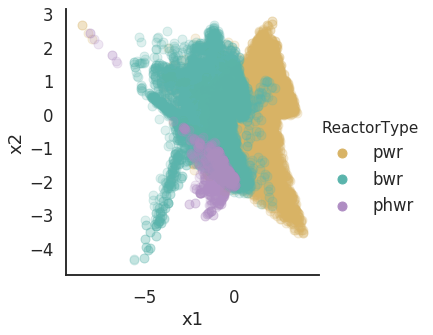

In [21]:
plt.clf()
sns.set_style('white')
sns.set_context('talk')
#sns.set(rc={'figure.figsize':(9,8)})
g = sns.lmplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df, fit_reg=False, scatter_kws={'alpha':0.2})
#g = sns.lmplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df, legend=False, fit_reg=False, scatter_kws={'alpha':0.5})
#plt.legend(loc='upper right', markerscale=2)
#g._legend.set_title("Reactor Type")
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
#    lh.set_sizes([50]) 
#plt.ylim(-8, 8)
#plt.xlim(-8, 8)
plt.show()

In [22]:
saveme = g.ax.get_figure()
saveme.savefig('lda-trainset_10ratios.png', transparent=True)

In [8]:
lda = LinearDiscriminantAnalysis(n_components=3)
fit = lda.fit(X, yo).transform(X)

In [9]:
target_names = yo.unique()
target_names

array(['ce14x14', 'ce16x16', 'w14x14', 'w15x15', 'w17x17', 's14x14',
       's18x18', 'bw15x15', 'vver1000', 'ge7x7-0', 'ge8x8-1', 'ge9x9-2',
       'ge10x10-8', 'abb8x8-1', 'atrium9x9-9', 'atrium10x10-9',
       'svea64-1', 'svea100-0', 'vver440', 'vver440_3.82', 'vver440_4.25',
       'vver440_4.38', 'candu19', 'candu28', 'candu37'], dtype=object)

In [10]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [11]:
colors = teals[0:9] + brwns + teals[9:13] + purps

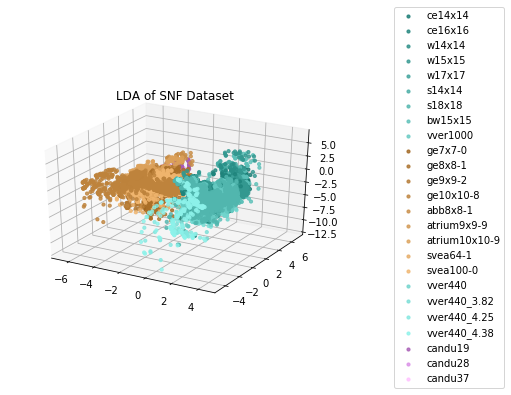

In [12]:
#target_names = ['pwr', 'bwr', 'phwr']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, target_name in zip(colors, target_names):
    ax.scatter(fit[yo == target_name, 0], fit[yo == target_name, 1], fit[yo == target_name, 2], 
                s=10, alpha=.8, color=color, label=target_name)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), shadow=False)
plt.title('LDA of SNF Dataset')
plt.show()

In [13]:
fit_df = pd.DataFrame(fit, columns=['x1', 'x2'])
df = pd.concat([fit_df, y], axis=1)

ValueError: Shape of passed values is (24795, 3), indices imply (24795, 2)

In [14]:
df.head()

NameError: name 'df' is not defined

In [15]:
ax = sns.scatterplot(x='x1', y='x2', hue="ReactorType", palette=med, data=df)

NameError: name 'df' is not defined